In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the dataset
# Load the zomato.csv dataset
zomato_data = pd.read_csv("https://github.com/dsrscientist/dataset4/raw/main/zomato.csv", encoding='ISO-8859-1')

# Load the Country-Code.xlsx dataset
country_code_data = pd.read_excel("https://github.com/dsrscientist/dataset4/raw/main/Country-Code.xlsx")

# Check the structure of the zomato dataset
zomato_data.head()

# Check the structure of the country code dataset
country_code_data.head()

# Merge the zomato dataset with the country code dataset using the 'Country Code' column
data = pd.merge(zomato_data, country_code_data, how='left', left_on='Country Code', right_on='Country Code')

data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


The data has 9551 rows × 22 columns

In [2]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [3]:
data.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey
9550,5927402,Walter's Coffee Roastery,208,ÛÁstanbul,"CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...",Moda,"Moda, ÛÁstanbul",29.026016,40.984776,Cafe,...,No,No,No,No,2,4.0,Green,Very Good,591,Turkey


In [4]:
data.shape

(9551, 22)

data has 9551 rows × 22 columns out of which 1 is target and remaining are independent variable

In [5]:
data.columns
data.columns.tolist()

['Restaurant ID',
 'Restaurant Name',
 'Country Code',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes',
 'Country']

In [6]:
#checking the null values
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

There area no null values in the data frame

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

<AxesSubplot:>

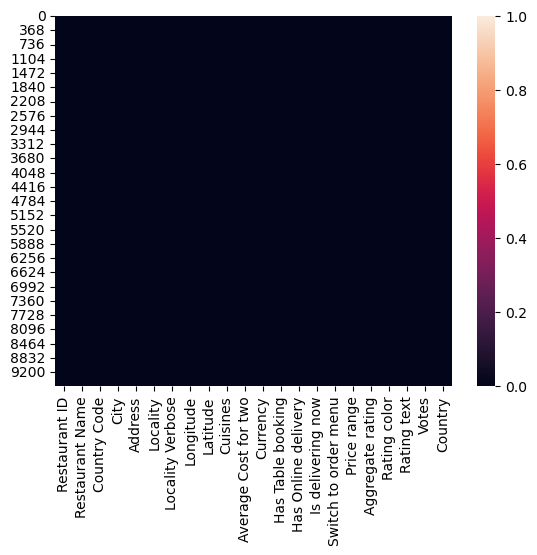

In [8]:
import seaborn as sns
sns.heatmap(data.isnull())

As there is single colour so there no null values as seen above also

In [9]:
# to check unique vqlues
data['Average Cost for two'].unique()


array([  1100,   1200,   4000,   1500,   1000,   2000,   6000,    800,
          900,    700,    850,    600,   3000,   1800,     55,     30,
           45,     60,     50,     80,     90,    200,    150,    100,
          230,    240,    350,    140,    170,    120,    250,     40,
           70,    300,     85,     75,    400,     65,     25,     10,
            0,     20,     35,      7,    270,    500,    430,    315,
          220,     95,    190,    260,    180,    330,    280,    160,
          285,    130,    110,   2500,   3600,    550,   1400,    450,
          950,    650,   1300,   2400,   1600,   2200,    750,   1700,
         1250,   1900,   2700,   3500,   5000,   2300,   1750,   3200,
         2100,   1850,   4500,   3300,   1350,   1650,   1950,   1050,
          290,   1450,   2800,   3650,   4800,   1550,    720,   6500,
         7000,   1150,   2900,   2600,   4700,   3700,   3800,   4100,
         4300,   2650,   5100,   5500,   4400,   4200,   8000,   2350,
      

In [10]:
data['Cuisines'].nunique()# number of unique values


1825

In [11]:
data['Price range'].nunique()# number of unique values


4

data is multi classification

In [12]:
data['Restaurant Name'].nunique()# number of unique values

7446

In [13]:
for i in data.columns:
    print(data[i].value_counts())
    print("\n")
    

6317637     1
18254520    1
18462589    1
18336474    1
18336477    1
           ..
313059      1
763         1
7557        1
525         1
5927402     1
Name: Restaurant ID, Length: 9551, dtype: int64


Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: Restaurant Name, Length: 7446, dtype: int64


1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64


New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan    

In [14]:
data["Price range"].unique()
data.shape[0]


9551

In [15]:
data.loc[data["Price range"]==" "]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country


In [16]:
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000



mean is more than the meadian in longitude average cost for two votes amount right skewed. 


In [17]:
#checking the unique values in each column
data.nunique().to_frame("No.of unique value")

,No.of unique value
Restaurant ID,9551
Restaurant Name,7446
Country Code,15
City,141
Address,8918
Locality,1208
Locality Verbose,1265
Longitude,8120
Latitude,8677
Cuisines,1825


In [18]:
numerical_columns = data.select_dtypes(include="number").columns
print(numerical_columns)


Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')


In [19]:
categorical_colm = []
for i in data.columns:
    if data[i].dtype == "object":
        categorical_colm.append(i)

print("Categorical columns:", categorical_colm)


Categorical columns: ['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text', 'Country']


 data visualization

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64


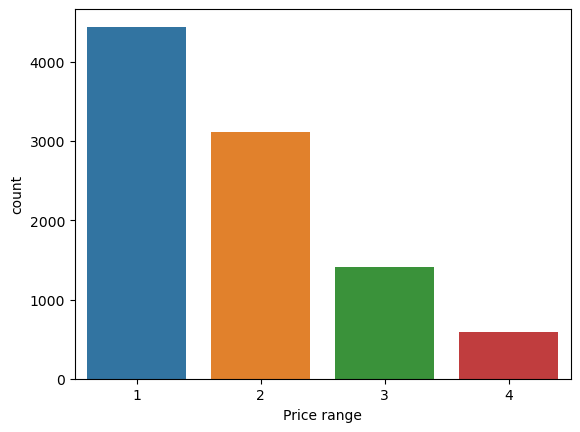

In [20]:

import seaborn as sns

if data["Price range"].notnull().any():
    sns.countplot(x='Price range', data=data)
    print(data["Price range"].value_counts())
else:
    print("The 'Price range' column does not contain any non-null values.")



C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

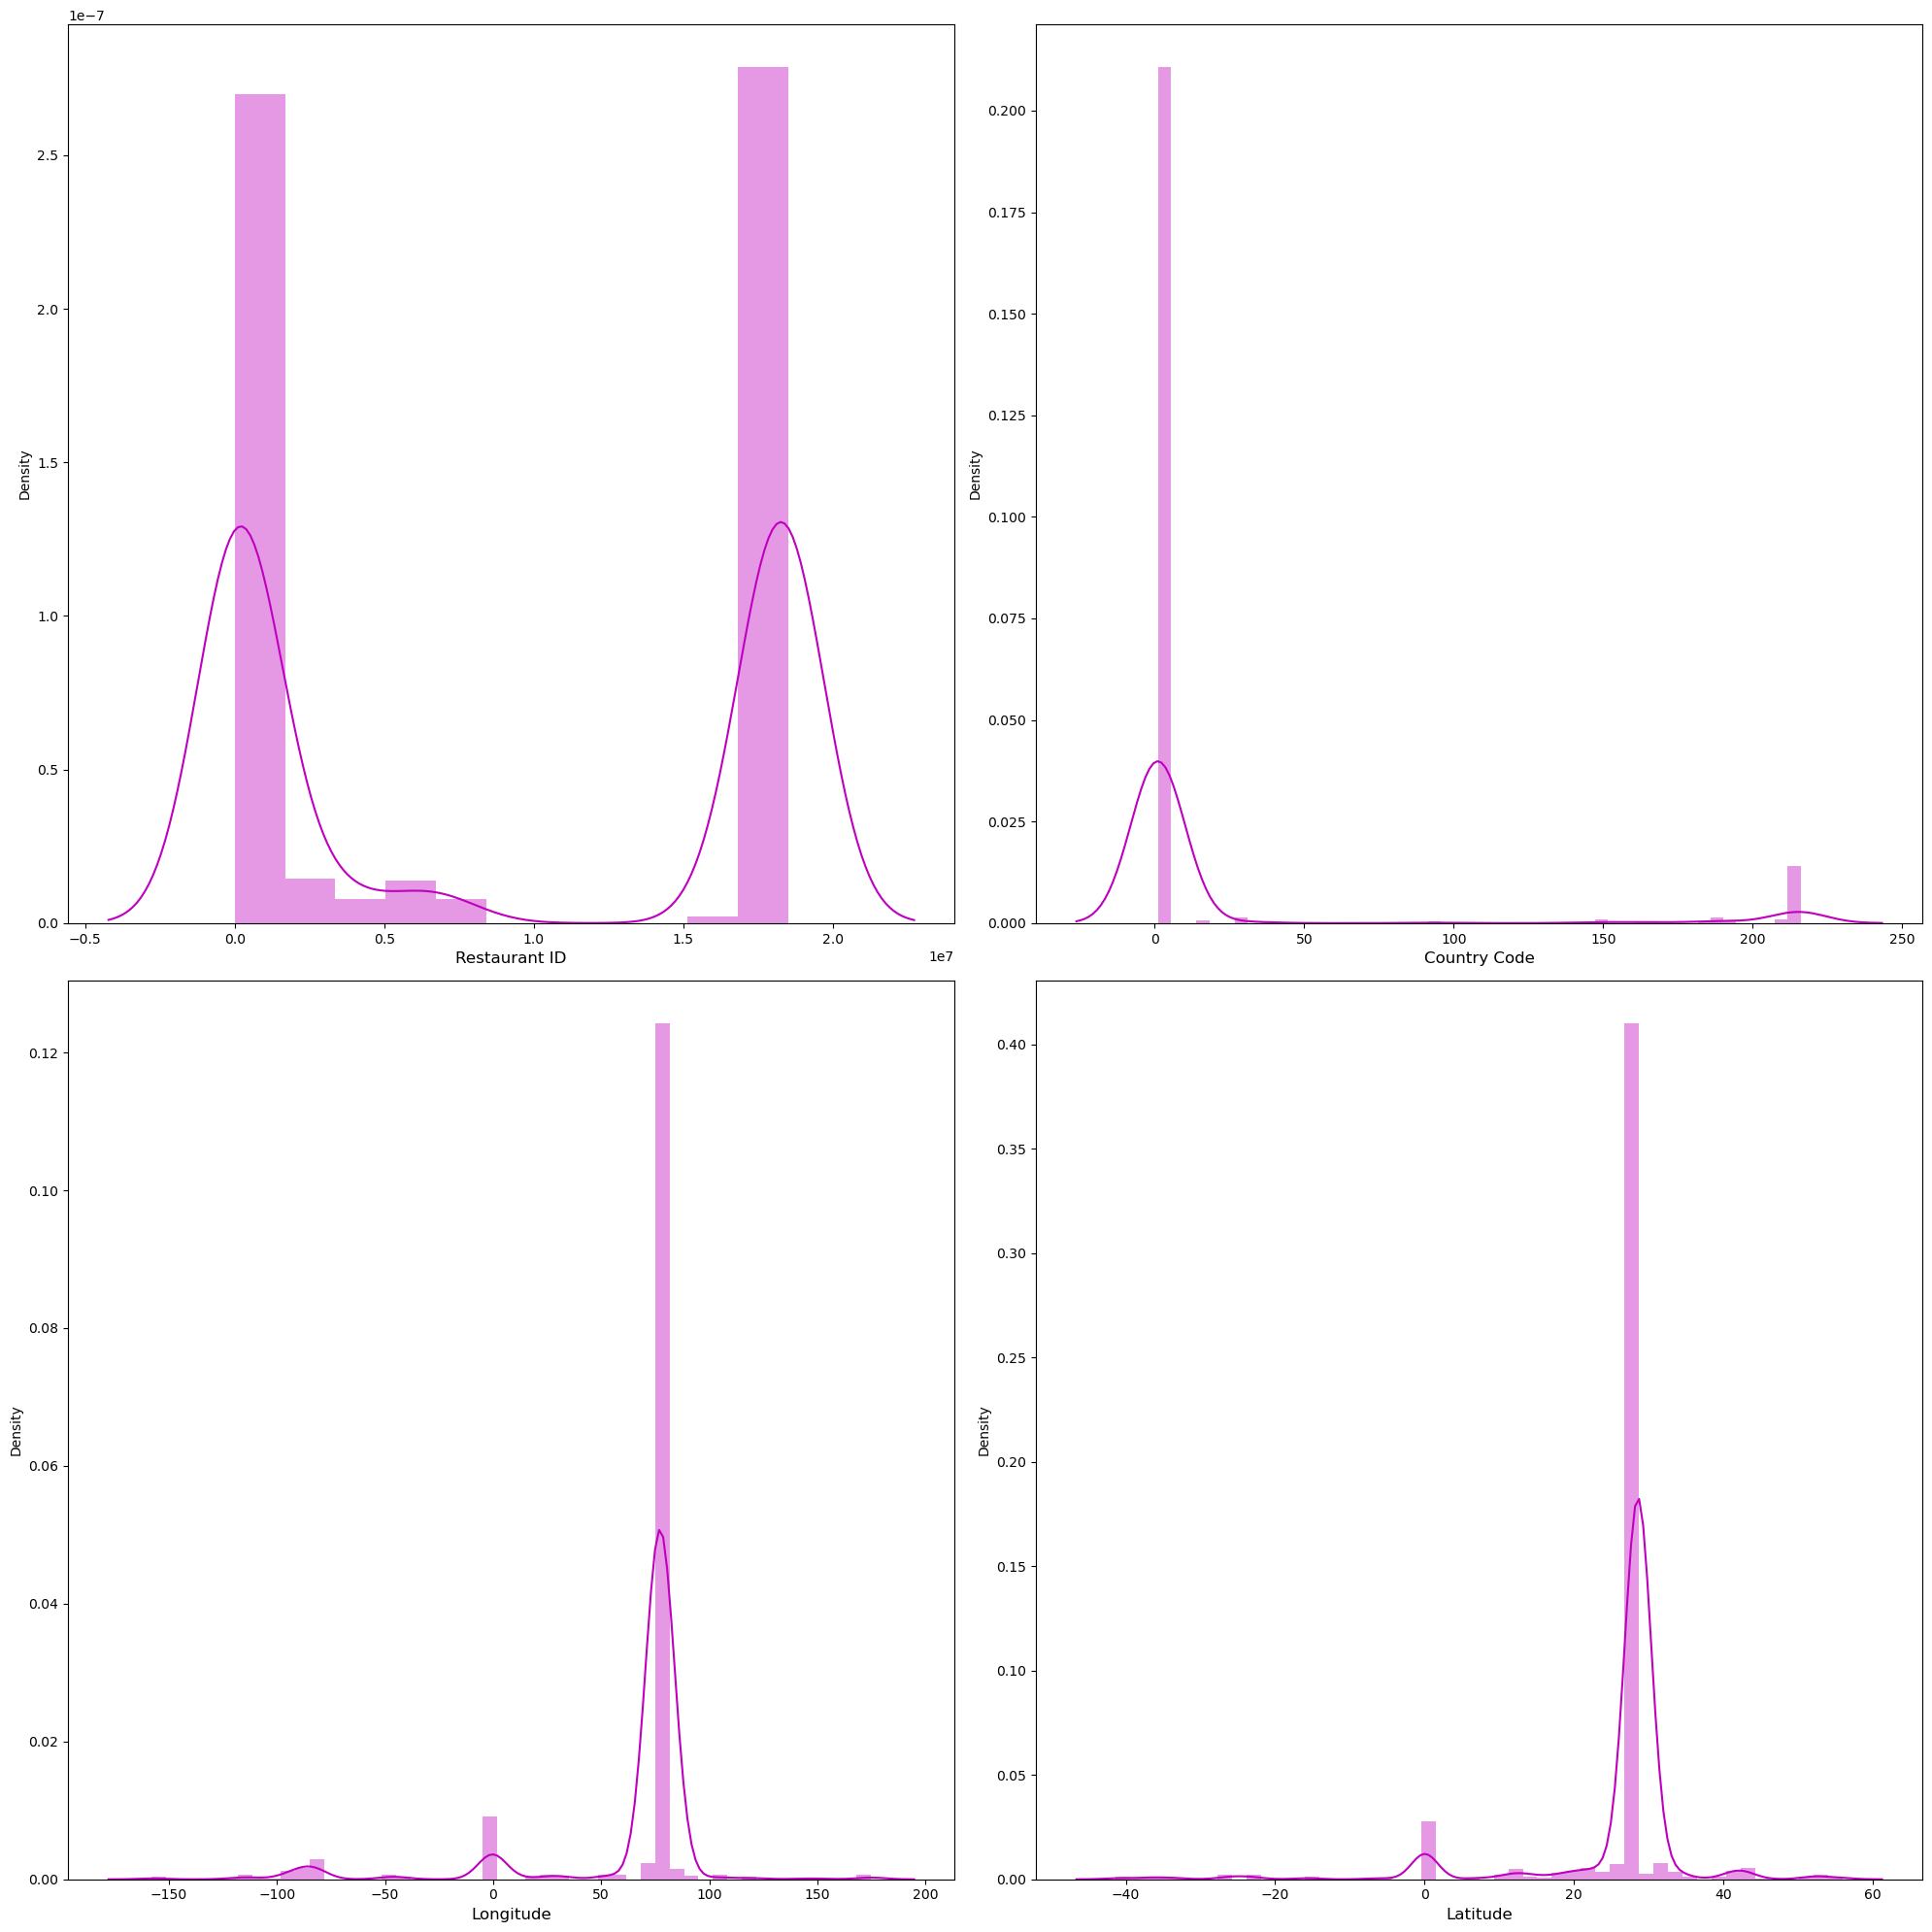

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20), facecolor="white")
plotnumber = 1
#numerical_columns = ['column1', 'column2', 'column3', 'column4']  # Replace with your actual numerical column names

for column in numerical_columns:
    if plotnumber <= 4:
        ax = plt.subplot(2, 2, plotnumber)
        sns.distplot(data[column], color="m")
        plt.xlabel(column, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber += 1

plt.tight_layout()
plt.show()


loam amount ,applicant income and coapplicant income is skewed  to right

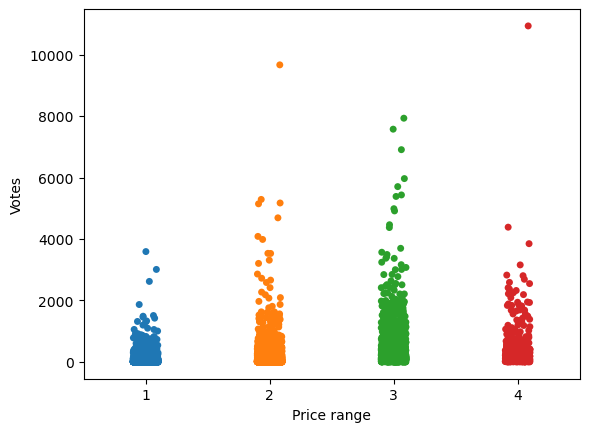

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.stripplot(x='Price range', y='Votes',data=data)
plt.show()

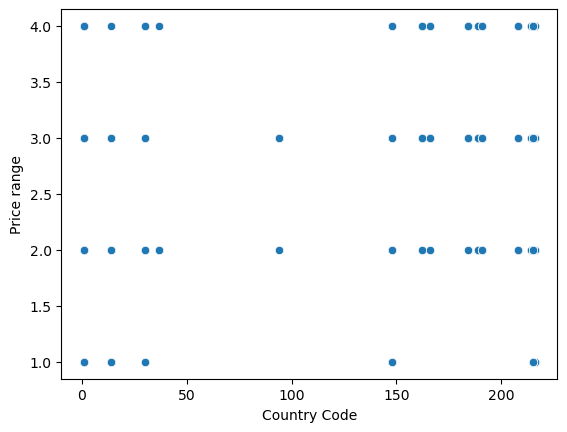

In [24]:
import matplotlib.pyplot as plt
sns.scatterplot(x='Country Code', y="Price range",data=data)
plt.show()


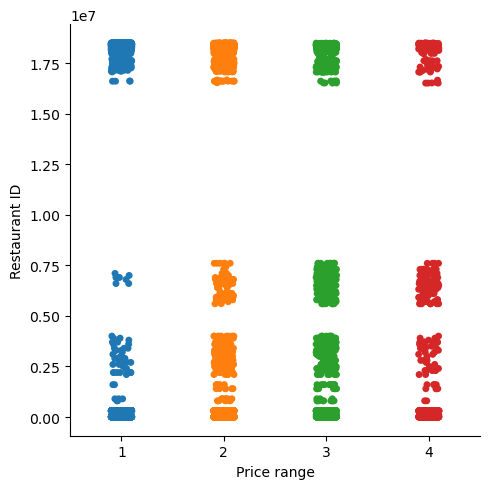

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='Price range', y='Restaurant ID', data=data)
plt.show()


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\axisgrid.py:1278: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.hue_vals = pd.Series(["_nolegend_"] * len(data),


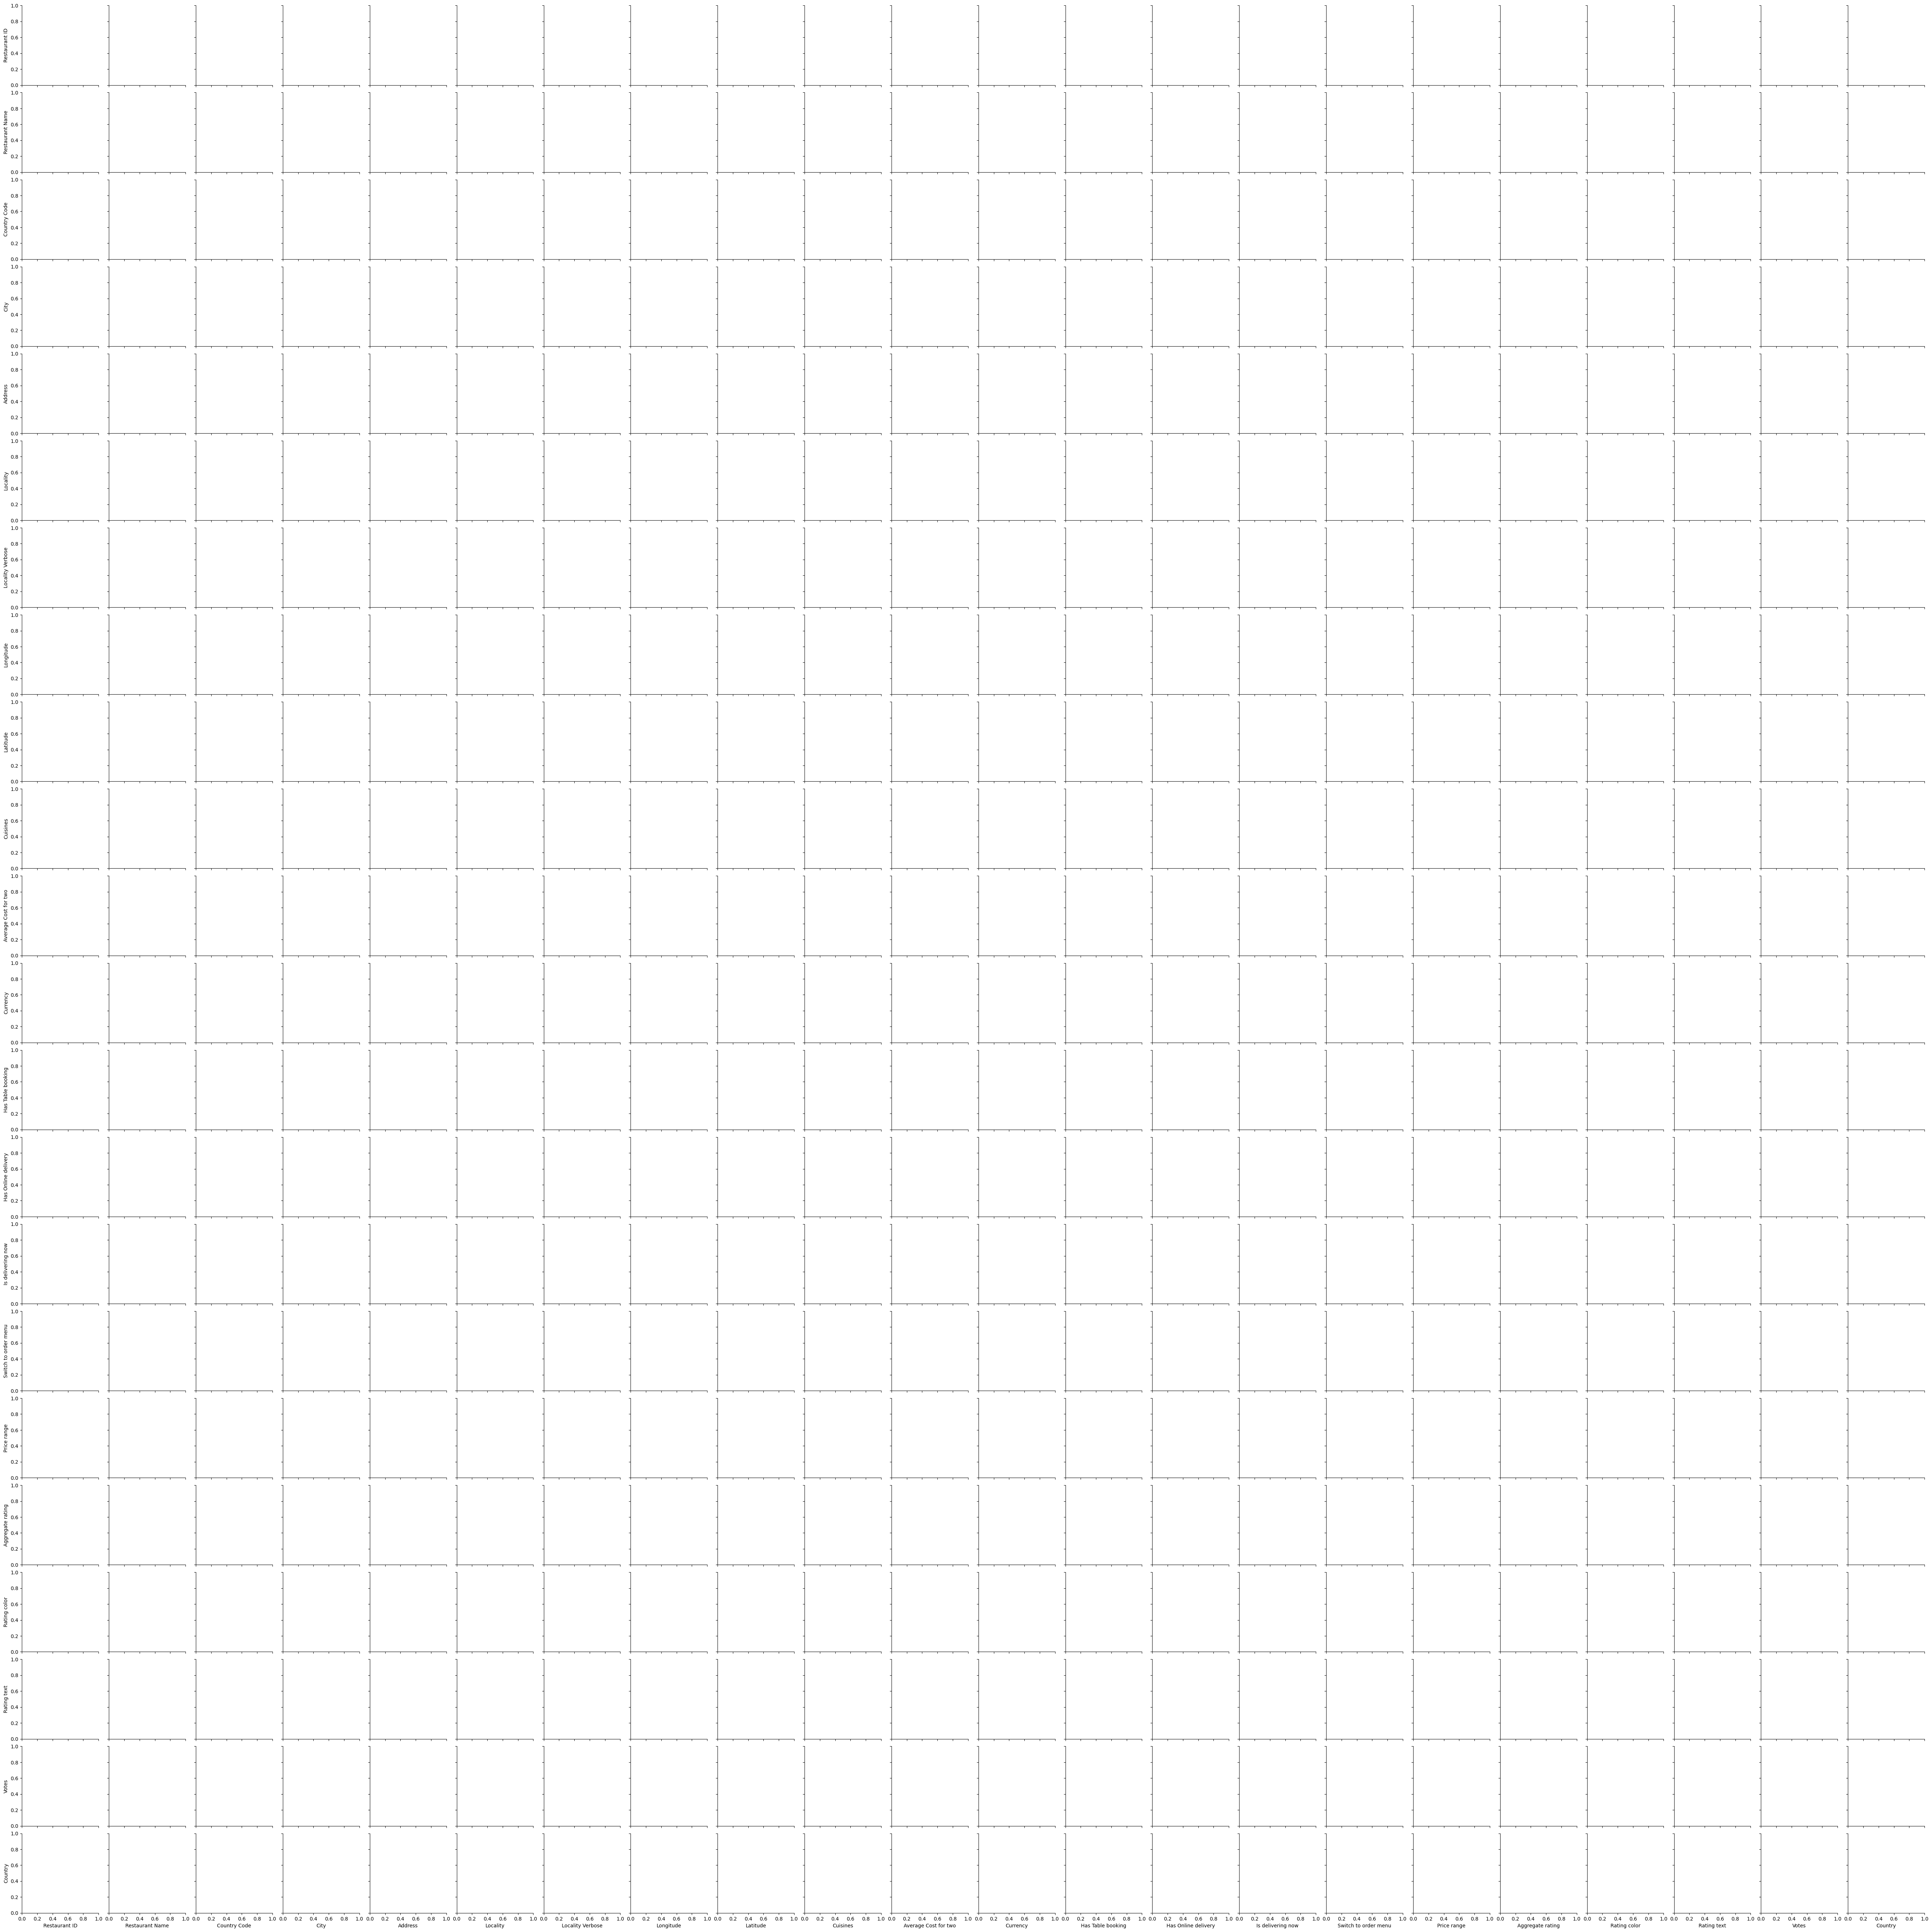

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Subset the DataFrame based on the condition
subset = data[data['Price range']== 'Yes']

# Create the pairplot
sns.pairplot(subset, palette='Dark2')

# Display the plot
plt.show()



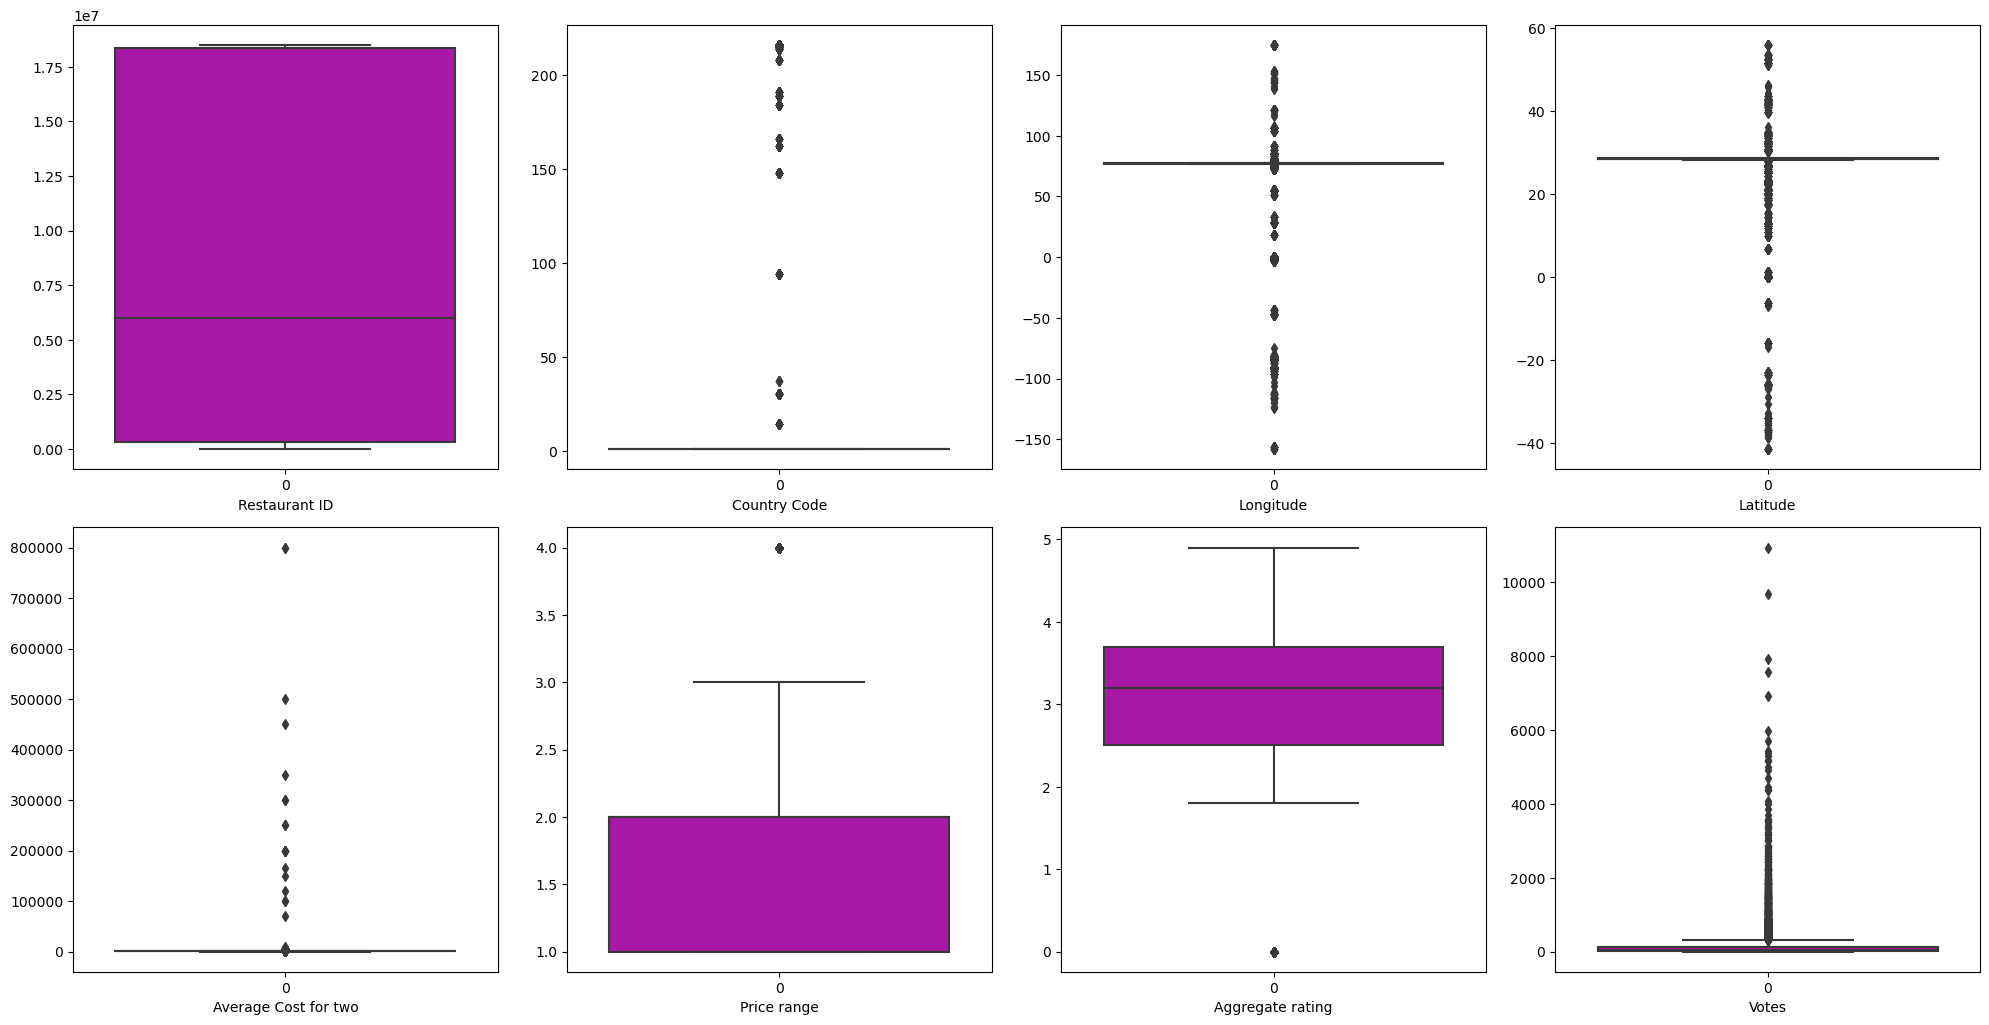

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(20, 25))

p = 1
numeric_columns = data.select_dtypes(include=[np.number]).columns  # Select only numeric columns

for i in numeric_columns:
    if p <= 13:
        ax = plt.subplot(5, 4, p)
        sns.boxplot(data=data[i], color="m")
        plt.xlabel(i)
        p += 1

plt.tight_layout()
plt.show()


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


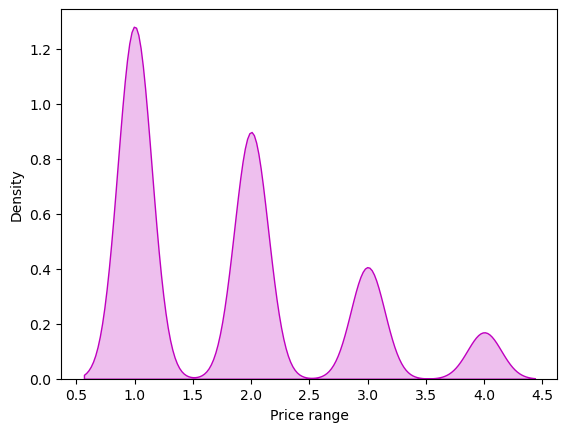

In [28]:
sns.distplot(data["Price range"], color="m", kde_kws={"shade": True}, hist=False)
plt.show()


not normalized

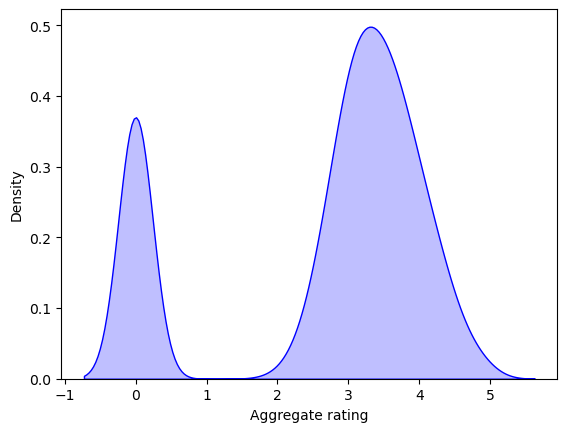

In [30]:
sns.distplot(data["Aggregate rating"], color="b", kde_kws={"shade": True}, hist=False)
plt.show()

left skewed

binomial distribution

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


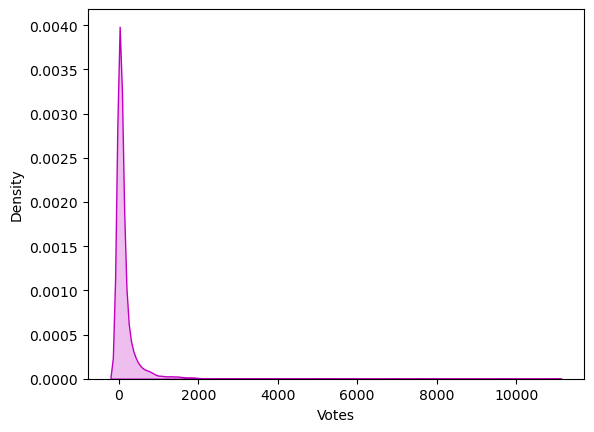

In [31]:
sns.distplot(data["Votes"], color="m", kde_kws={"shade": True}, hist=False)
plt.show()

bimonial data

Encoding Categorical Columns               
               



In [32]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=OE.fit_transform(data[i].values.reshape(-1,1))
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,3749.0,162,73.0,8685.0,171.0,172.0,121.027535,14.565443,920.0,...,1.0,0.0,0.0,0.0,3,4.8,0.0,1.0,314,6.0
1,6304287,3173.0,162,73.0,6055.0,593.0,601.0,121.014101,14.553708,1111.0,...,1.0,0.0,0.0,0.0,3,4.5,0.0,1.0,591,6.0
2,6300002,2897.0,162,75.0,4684.0,308.0,314.0,121.056831,14.581404,1671.0,...,1.0,0.0,0.0,0.0,4,4.4,1.0,5.0,270,6.0
3,6318506,4707.0,162,75.0,8690.0,862.0,875.0,121.056475,14.585318,1126.0,...,0.0,0.0,0.0,0.0,4,4.9,0.0,1.0,365,6.0
4,6314302,5523.0,162,75.0,8689.0,862.0,875.0,121.057508,14.584450,1122.0,...,1.0,0.0,0.0,0.0,4,4.8,0.0,1.0,229,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,4443.0,208,140.0,5926.0,517.0,523.0,28.977392,41.022793,1813.0,...,0.0,0.0,0.0,0.0,3,4.1,1.0,5.0,788,11.0
9547,5908749,1311.0,208,140.0,5962.0,552.0,558.0,29.041297,41.009847,1824.0,...,0.0,0.0,0.0,0.0,3,4.2,1.0,5.0,1034,11.0
9548,5915807,3069.0,208,140.0,5966.0,554.0,561.0,29.034640,41.055817,1110.0,...,0.0,0.0,0.0,0.0,4,3.7,5.0,2.0,661,11.0
9549,5916112,513.0,208,140.0,5967.0,554.0,561.0,29.036019,41.057979,1657.0,...,0.0,0.0,0.0,0.0,4,4.0,1.0,5.0,901,11.0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   float64
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   float64
 4   Address               9551 non-null   float64
 5   Locality              9551 non-null   float64
 6   Locality Verbose      9551 non-null   float64
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   float64
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   float64
 12  Has Table booking     9551 non-null   float64
 13  Has Online delivery   9551 non-null   float64
 14  Is delivering now     9551 non-null   float64
 15  Switch to order menu 

In [34]:
data.describe()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9542.000000,...,9551.000000,9551.000000,9551.000000,9551.0,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,3653.204586,18.365616,78.301434,4542.439430,658.128468,677.304994,64.126574,25.854381,989.163173,...,0.121244,0.256622,0.003560,0.0,1.804837,2.666370,2.952885,1.788713,156.909748,3.736781
std,8.791521e+06,2142.917876,56.750546,23.198915,2565.717005,315.866515,331.727449,41.467058,11.007935,514.326600,...,0.326428,0.436792,0.059561,0.0,0.905609,1.516378,1.493048,1.694637,430.169145,2.651963
min,5.300000e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-157.948486,-41.330428,0.000000,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.019625e+05,1777.500000,1.000000,76.000000,2323.500000,381.000000,387.000000,77.081343,28.478713,497.000000,...,0.000000,0.000000,0.000000,0.0,1.000000,2.500000,2.000000,0.000000,5.000000,3.000000
50%,6.004089e+06,3595.000000,1.000000,88.000000,4610.000000,696.000000,707.000000,77.191964,28.570469,1126.000000,...,0.000000,0.000000,0.000000,0.0,2.000000,3.200000,2.000000,2.000000,31.000000,3.000000
75%,1.835229e+07,5485.500000,1.000000,88.000000,6746.500000,921.000000,953.000000,77.282006,28.642758,1354.000000,...,0.000000,1.000000,0.000000,0.0,2.000000,3.700000,4.000000,3.000000,131.000000,3.000000
max,1.850065e+07,7445.000000,216.000000,140.000000,8917.000000,1207.000000,1264.000000,174.832089,55.976980,1824.000000,...,1.000000,1.000000,1.000000,0.0,4.000000,4.900000,5.000000,5.000000,10934.000000,14.000000


CORRELATION BETWEEN TARGET VARIABLE AND INDEPENDENT VARIABLE

In [35]:
corr=data.corr()
corr

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
Restaurant ID,1.000000,0.003999,0.148471,-0.005844,0.080615,0.069511,0.070102,-0.226081,-0.052081,-0.079240,...,-0.110071,-0.085089,0.012548,NaN,-0.134540,-0.326212,0.130540,0.251114,-0.147023,0.161763
Restaurant Name,0.003999,1.000000,0.020012,-0.001399,0.000763,0.004322,0.004281,-0.001920,0.009922,0.051782,...,0.041173,0.028082,0.011984,NaN,0.061275,0.029367,-0.007311,0.012131,0.018512,0.017560
Country Code,0.148471,0.020012,1.000000,-0.181728,-0.220342,-0.120075,-0.117543,-0.698299,0.019792,-0.135727,...,-0.061682,-0.154605,-0.018291,NaN,0.243327,0.282189,-0.187174,0.222685,0.154530,0.968700
City,-0.005844,-0.001399,-0.181728,1.000000,-0.019763,0.096444,0.093142,0.117391,-0.004301,0.027176,...,-0.003762,0.012723,-0.014039,NaN,-0.105759,-0.132163,0.110887,-0.098985,-0.078406,-0.180959
Address,0.080615,0.000763,-0.220342,-0.019763,1.000000,0.159555,0.160495,0.185801,-0.038654,0.024629,...,0.006428,0.029874,0.031267,NaN,-0.034952,-0.151153,0.071264,-0.008029,-0.101754,-0.235815
Locality,0.069511,0.004322,-0.120075,0.096444,0.159555,1.000000,0.999465,0.086448,-0.020424,0.007298,...,-0.065594,-0.030993,-0.007299,NaN,-0.114459,-0.174336,0.036831,-0.036969,-0.123569,-0.118784
Locality Verbose,0.070102,0.004281,-0.117543,0.093142,0.160495,0.999465,1.000000,0.084342,-0.020905,0.006256,...,-0.065132,-0.031766,-0.007353,NaN,-0.112313,-0.173254,0.037104,-0.035430,-0.122877,-0.116406
Longitude,-0.226081,-0.001920,-0.698299,0.117391,0.185801,0.086448,0.084342,1.000000,0.043207,0.129325,...,0.100488,0.178757,0.018787,NaN,-0.078939,-0.116818,0.059979,-0.181466,-0.085101,-0.766221
Latitude,-0.052081,0.009922,0.019792,-0.004301,-0.038654,-0.020424,-0.020905,0.043207,1.000000,0.037841,...,0.054658,0.118722,0.015001,NaN,-0.166688,0.000516,0.042590,-0.129447,-0.022962,0.181299
Cuisines,-0.079240,0.051782,-0.135727,0.027176,0.024629,0.007298,0.006256,0.129325,0.037841,1.000000,...,0.050867,-0.016303,0.007809,NaN,-0.005265,-0.080832,-0.016261,-0.079944,-0.032935,-0.131155


In [ ]:
education_num has 33% corelattion with income

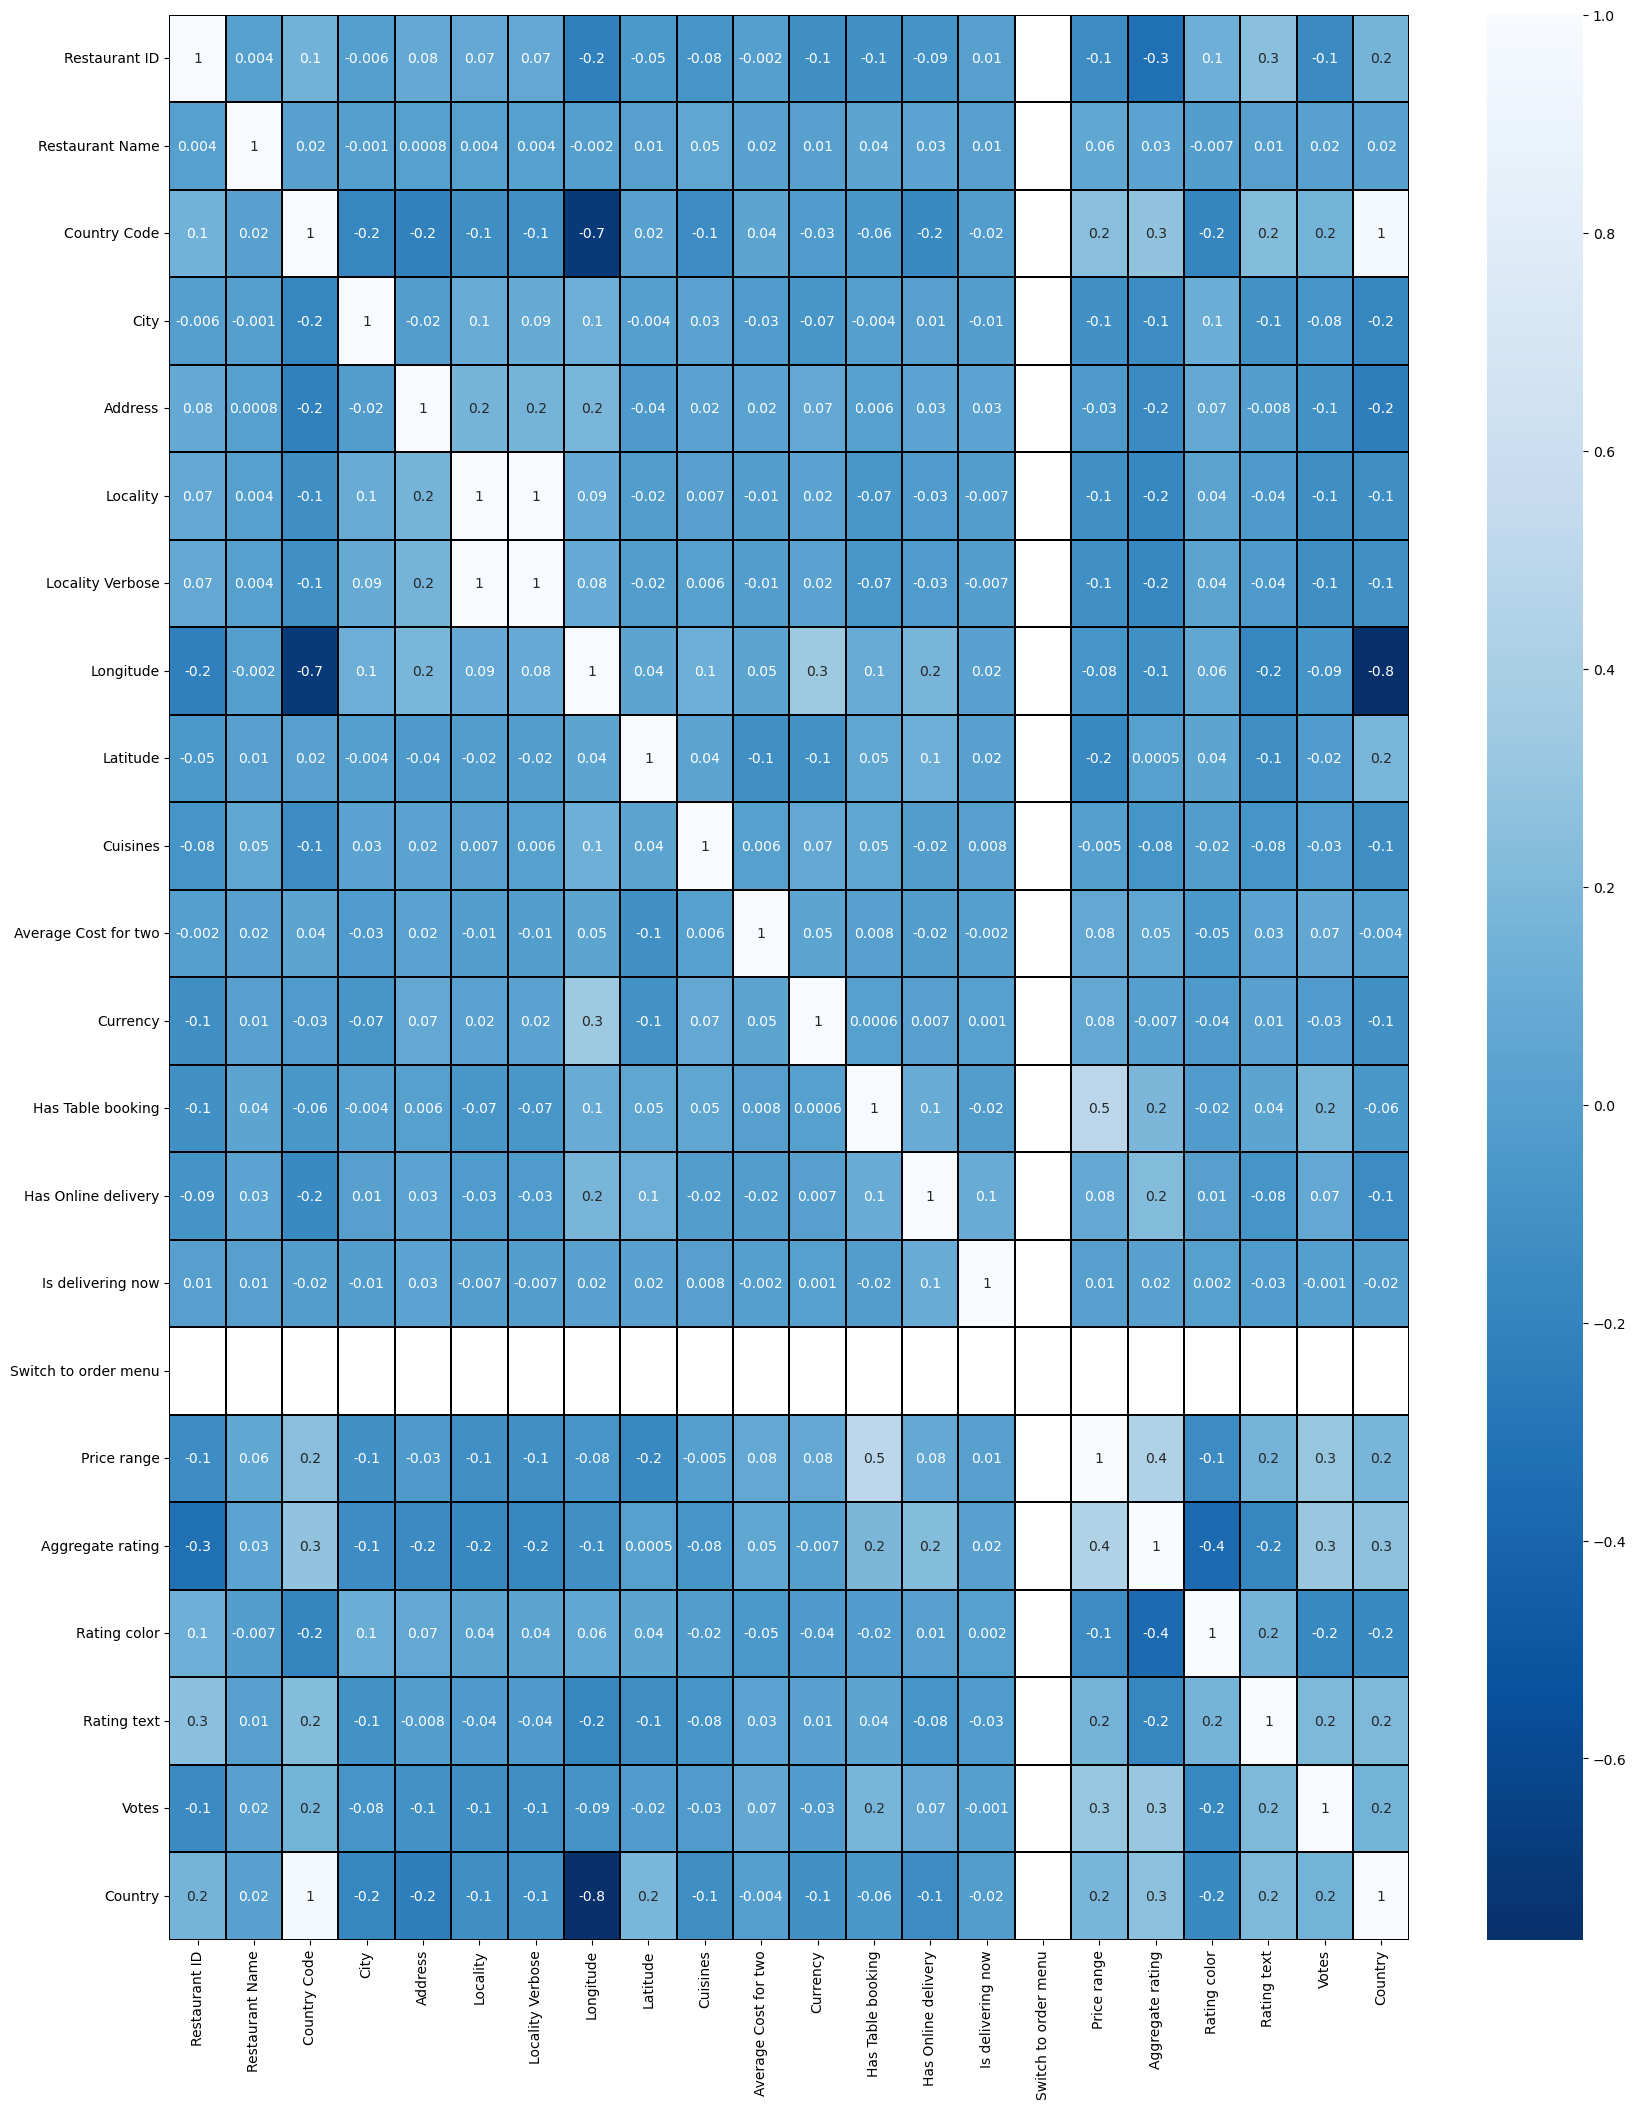

In [36]:
plt.figure(figsize=(20,25))
sns.heatmap(data.corr(),linewidth=0.1,fmt="0.1g",linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation=0)
plt.show()

HEAT MAP CONSISTS OF BOTH POSITIVE AND NEGATIVE CORELATION. credit history  54 % POSITIVE CORELATION WITH TARGET. 

In [37]:
corr["Price range"].sort_values(ascending=False)

Price range             1.000000
Has Table booking       0.501925
Aggregate rating        0.437944
Votes                   0.309444
Country Code            0.243327
Country                 0.178035
Rating text             0.164242
Has Online delivery     0.077918
Currency                0.075179
Average Cost for two    0.075083
Restaurant Name         0.061275
Is delivering now       0.010940
Cuisines               -0.005265
Address                -0.034952
Longitude              -0.078939
City                   -0.105759
Locality Verbose       -0.112313
Locality               -0.114459
Restaurant ID          -0.134540
Rating color           -0.140468
Latitude               -0.166688
Switch to order menu         NaN
Name: Price range, dtype: float64

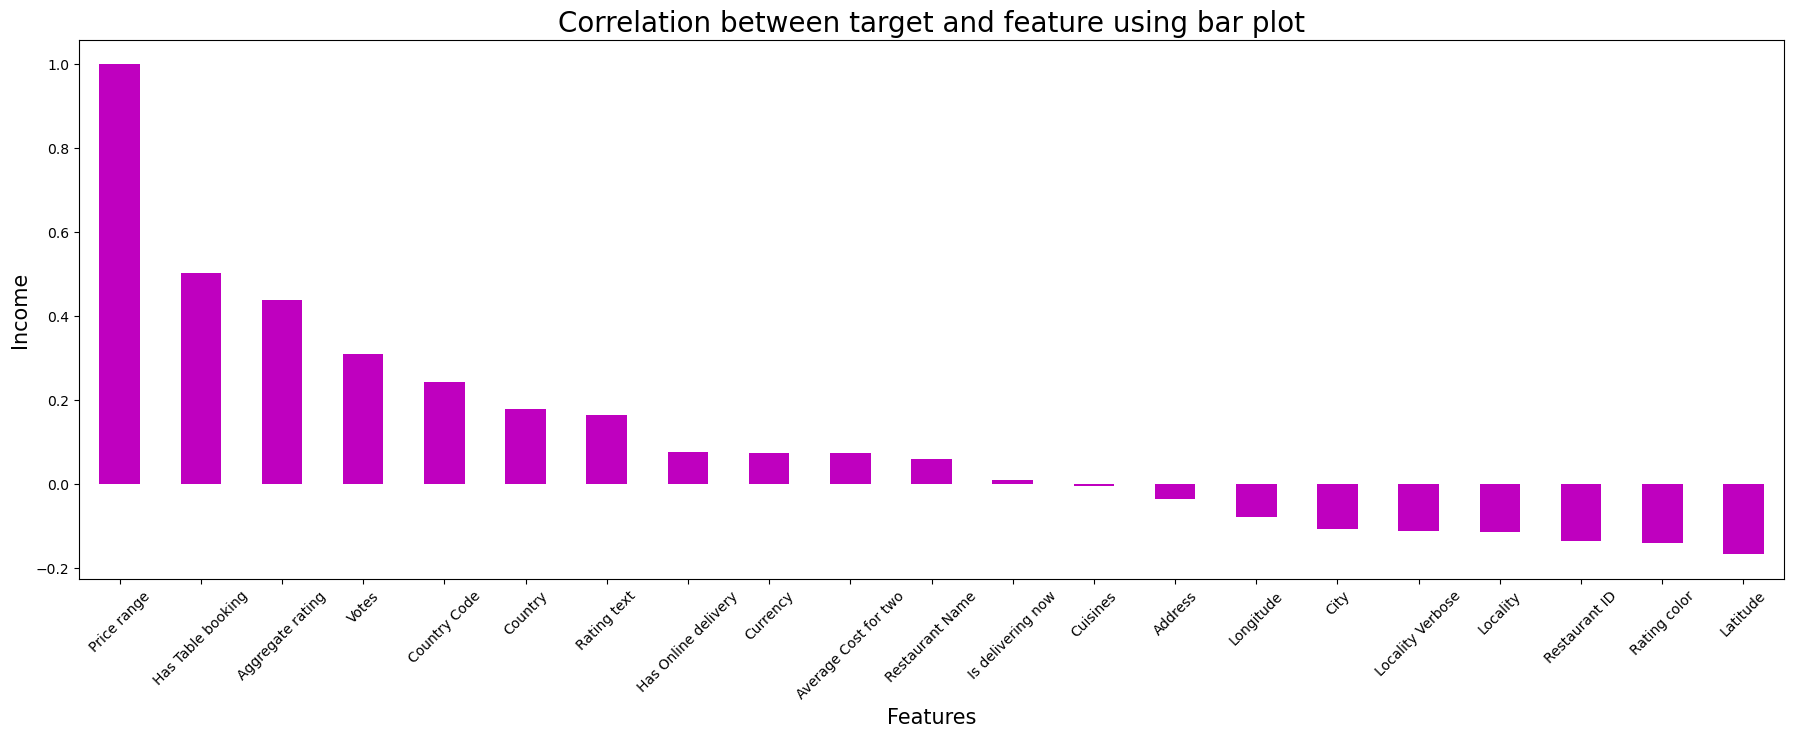

In [38]:
plt.figure(figsize=(22,7), facecolor="white")
data.corr()["Price range"].sort_values(ascending=False).drop(["Switch to order menu"]).plot(kind="bar",color="m")
plt.xlabel("Features", fontsize=15)  # Set a single x-label for all features
plt.ylabel("Income", fontsize=15)
plt.title("Correlation between target and feature using bar plot", fontsize=20)
plt.xticks(rotation=45)  # Rotate x-labels if needed
plt.show()


Seprating featires and labels

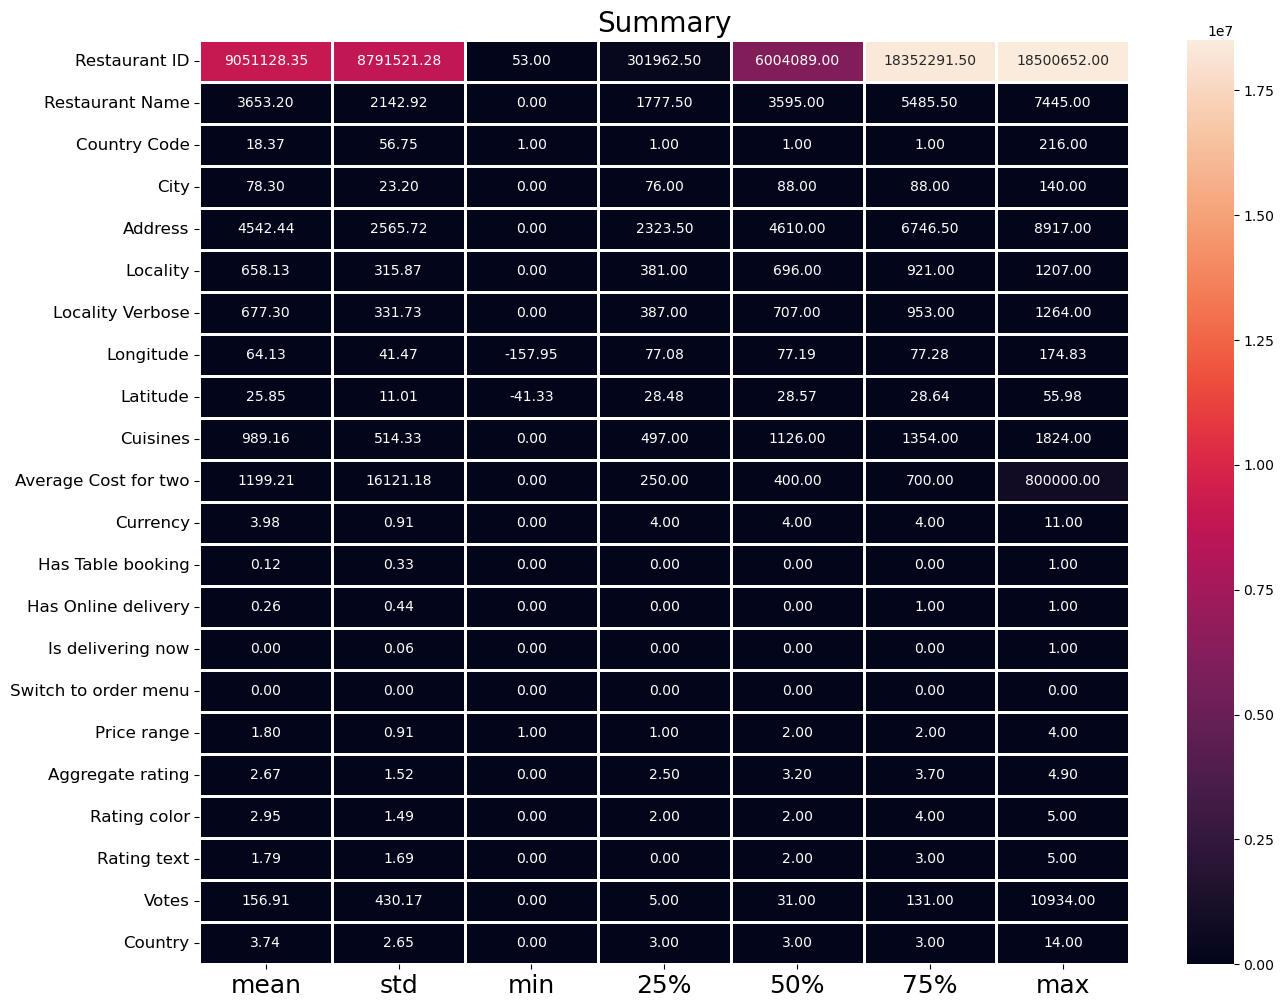

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 12))
sns.heatmap(data.describe()[1:].transpose(), linewidths=2, annot=True, fmt=".2f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Summary", fontsize=20)

plt.show()


In [73]:
x=data.drop("Price range",axis=1)
y=data["Price range"]

In [46]:
from sklearn.preprocessing import StandardScaler
x=data.drop("Price range",axis=1)
y=data["Price range"]
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x



,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Aggregate rating,Rating color,Rating text,Votes,Country
0,-0.310940,0.044706,2.531111,-0.228533,1.614667,-1.542278,-1.523333,1.372269,-1.025581,-0.134480,...,-4.351046,2.692181,-0.587547,-0.059771,0.0,1.407131,-1.977859,-0.465442,0.365202,0.853457
1,-0.312458,-0.224101,2.531111,-0.228533,0.589558,-0.206201,-0.230035,1.371945,-1.026647,0.236899,...,-4.351046,2.692181,-0.587547,-0.059771,0.0,1.209281,-1.977859,-0.465442,1.009168,0.853457
2,-0.312946,-0.352904,2.531111,-0.142317,0.055177,-1.108528,-1.095249,1.372975,-1.024131,1.325758,...,-4.351046,2.692181,-0.587547,-0.059771,0.0,1.143331,-1.308053,1.895070,0.262911,0.853457
3,-0.310841,0.491783,2.531111,-0.142317,1.616615,0.645470,0.595987,1.372966,-1.023775,0.266064,...,-4.351046,-0.371446,-0.587547,-0.059771,0.0,1.473081,-1.977859,-0.465442,0.483766,0.853457
4,-0.311319,0.872592,2.531111,-0.142317,1.616226,0.645470,0.595987,1.372991,-1.023854,0.258287,...,-4.351046,2.692181,-0.587547,-0.059771,0.0,1.407131,-1.977859,-0.465442,0.167595,0.853457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,-0.356658,0.368580,3.341718,2.659685,0.539277,-0.446821,-0.465180,-0.847685,1.378025,1.601862,...,7.681415,-0.371446,-0.587547,-0.059771,0.0,0.945480,-1.308053,1.895070,1.467151,2.738952
9547,-0.357452,-1.093055,3.341718,2.659685,0.553309,-0.336009,-0.359666,-0.846144,1.376849,1.623250,...,7.681415,-0.371446,-0.587547,-0.059771,0.0,1.011430,-1.308053,1.895070,2.039049,2.738952
9548,-0.356649,-0.272635,3.341718,2.659685,0.554868,-0.329677,-0.350622,-0.846305,1.381025,0.234954,...,7.681415,-0.371446,-0.587547,-0.059771,0.0,0.681680,1.371170,0.124686,1.171903,2.738952
9549,-0.356614,-1.465464,3.341718,2.659685,0.555258,-0.329677,-0.350622,-0.846272,1.381221,1.298536,...,7.681415,-0.371446,-0.587547,-0.059771,0.0,0.879530,-1.308053,1.895070,1.729853,2.738952


CHECKING VARIANCE INFLATION(VIF)

In [47]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only the numeric columns for VIF calculation
numeric_columns = x.select_dtypes(include=[float, int]).columns
x_numeric = x[numeric_columns]

# Handle missing values
x_numeric = x_numeric.replace([np.inf, -np.inf], np.nan)
x_numeric = x_numeric.dropna()

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = x_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(x_numeric.values, i) for i in range(x_numeric.shape[1])]

# Print VIF data
print(vif_data)




                 Feature         VIF
0          Restaurant ID    1.306603
1        Restaurant Name    1.007319
2           Country Code   46.398564
3                   City    1.085534
4                Address    1.113828
5               Locality  953.231323
6       Locality Verbose  952.327257
7              Longitude    4.997694
8               Latitude    3.044799
9               Cuisines    1.047621
10  Average Cost for two    1.045062
11              Currency    1.303560
12     Has Table booking    1.099635
13   Has Online delivery    1.166254
14     Is delivering now    1.013812
15  Switch to order menu         NaN
16      Aggregate rating    1.783836
17          Rating color    1.236118
18           Rating text    1.348279
19                 Votes    1.275050
20               Country   64.232598


C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Education_num has highest VIF Terefore it is dropped first

In [48]:
# dropping date column
x.drop("Locality Verbose",axis=1,inplace=True)

In [49]:

import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only the numeric columns for VIF calculation
numeric_columns = x.select_dtypes(include=[float, int]).columns
x_numeric = x[numeric_columns]

# Handle missing values
x_numeric = x_numeric.replace([np.inf, -np.inf], np.nan)
x_numeric = x_numeric.dropna()

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = x_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(x_numeric.values, i) for i in range(x_numeric.shape[1])]

# Print VIF data
print(vif_data)


                 Feature        VIF
0          Restaurant ID   1.306602
1        Restaurant Name   1.007312
2           Country Code  46.376582
3                   City   1.077524
4                Address   1.111863
5               Locality   1.070511
6              Longitude   4.997125
7               Latitude   3.044777
8               Cuisines   1.047339
9   Average Cost for two   1.045062
10              Currency   1.302777
11     Has Table booking   1.099390
12   Has Online delivery   1.165898
13     Is delivering now   1.013812
14  Switch to order menu        NaN
15      Aggregate rating   1.783171
16          Rating color   1.235036
17           Rating text   1.347868
18                 Votes   1.275049
19               Country  64.220808


C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [50]:
y.value_counts()

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64

The data is not balanced since it is a classification problem

In [51]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Select only the numeric columns for VIF calculation
numeric_columns = x.select_dtypes(include=[float, int]).columns
x_numeric = x[numeric_columns]

# Handle missing values
x_numeric = x_numeric.replace([np.inf, -np.inf], np.nan)
x_numeric = x_numeric.dropna()

# Convert non-numeric values in x to numeric representation
x_numeric = x_numeric.apply(pd.to_numeric, errors='coerce')

# Convert non-numeric values in y to numeric representation using label encoding
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Ensure x and y have the same number of samples
min_samples = min(len(x_numeric), len(y_encoded))
x_numeric = x_numeric[:min_samples]
y_encoded = y_encoded[:min_samples]

# Apply SMOTE for oversampling
sm = SMOTE()
x_resampled, y_resampled = sm.fit_resample(x_numeric, y_encoded)





In [52]:
# Checking value count of target column
y.value_counts()

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64

data is balanced

MODELLING

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Select the features (independent variables) and target (dependent variable)
x = data.iloc[:, :-1]  # All columns except the last one
y = data['Price range']  # Target variable

# Perform data preprocessing
imputer = SimpleImputer(strategy='mean')
x = imputer.fit_transform(x)

scaler = StandardScaler()
x = scaler.fit_transform(x)

maxAcc = 0
maxRS = 0

for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    predict = RFR.predict(x_test)
    acc = accuracy_score(y_test, predict)
    
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i

print("Best Accuracy is", maxAcc, "on random state", maxRS)



Best Accuracy is 1.0 on random state 1


In [54]:
# cREATING TRAIN TEST SPLIT
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=maxRS)

In [55]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeRegressor, ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, roc_auc_score






In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

RFC = RandomForestClassifier()
RFC.fit(x_train, np.array(y_train))
pred_RFC = RFC.predict(x_test)
pred_train = RFC.predict(x_train)
print(accuracy_score(y_test, pred_RFC))
print(confusion_matrix(y_test, pred_RFC))



1.0
[[1295    0    0    0]
 [   0  948    0    0]
 [   0    0  443    0]
 [   0    0    0  180]]


In [77]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)

print(accuracy_score(y_test,pred_LR))
print(confusion_matrix(y_test,pred_LR))
print(classification_report(y_test,pred_LR))

0.15745079662605435
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  6  4  0]
 [ 0  0 38 ...  1  0  0]
 ...
 [ 0  0  0 ... 36  9  0]
 [ 0  0  0 ... 15 23  0]
 [ 0  0  1 ...  8  4  5]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       112
         1.0       0.00      0.00      0.00        88
         2.0       0.33      0.37      0.35       103
         3.0       0.00      0.00      0.00       105
         4.0       0.16      0.08      0.10       104
         5.0       0.07      0.33      0.12        96
         6.0       0.15      0.33      0.20        92
         7.0       0.06      0.01      0.02       111
         8.0       0.85      0.46      0.60       112
         9.0       0.12      0.41      0.19       111
        10.0       0.00      0.00      0.00        95
        11.0       0.15      0.02      0.03       106
        12.0       0.18      0.49      0.26        92
        13.0       0.34      0.32      0.33       103
        14.0 

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

In [57]:
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
pred_train=svc.predict(x_train)

print(accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

0.9919748778785764
[[1292    3    0    0]
 [   0  942    6    0]
 [   0    3  438    2]
 [   0    1    8  171]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1295
           2       0.99      0.99      0.99       948
           3       0.97      0.99      0.98       443
           4       0.99      0.95      0.97       180

    accuracy                           0.99      2866
   macro avg       0.99      0.98      0.98      2866
weighted avg       0.99      0.99      0.99      2866



In [58]:
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
pred_GB=GB.predict(x_test)
pred_train=GB.predict(x_train)

print(accuracy_score(y_test,pred_GB))
print(confusion_matrix(y_test,pred_GB))
print(classification_report(y_test,pred_GB))

1.0
[[1295    0    0    0]
 [   0  948    0    0]
 [   0    0  443    0]
 [   0    0    0  180]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1295
           2       1.00      1.00      1.00       948
           3       1.00      1.00      1.00       443
           4       1.00      1.00      1.00       180

    accuracy                           1.00      2866
   macro avg       1.00      1.00      1.00      2866
weighted avg       1.00      1.00      1.00      2866



In [59]:
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
pred_ABC=ABC.predict(x_test)
pred_train=ABC.predict(x_train)

print(accuracy_score(y_test,pred_ABC))
print(confusion_matrix(y_test,pred_ABC))
print(classification_report(y_test,pred_ABC))

0.8454291695743196
[[1295    0    0    0]
 [   0  948    0    0]
 [   0  443    0    0]
 [   0    0    0  180]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1295
           2       0.68      1.00      0.81       948
           3       0.00      0.00      0.00       443
           4       1.00      1.00      1.00       180

    accuracy                           0.85      2866
   macro avg       0.67      0.75      0.70      2866
weighted avg       0.74      0.85      0.78      2866



C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
BC=BaggingClassifier()
BC.fit(x_train,y_train)
pred_BC=BC.predict(x_test)
pred_train=BC.predict(x_train)

print(accuracy_score(y_test,pred_BC))
print(confusion_matrix(y_test,pred_BC))
print(classification_report(y_test,pred_BC))

1.0
[[1295    0    0    0]
 [   0  948    0    0]
 [   0    0  443    0]
 [   0    0    0  180]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1295
           2       1.00      1.00      1.00       948
           3       1.00      1.00      1.00       443
           4       1.00      1.00      1.00       180

    accuracy                           1.00      2866
   macro avg       1.00      1.00      1.00      2866
weighted avg       1.00      1.00      1.00      2866



In [61]:
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
pred_ET=ET.predict(x_test)
pred_train=ET.predict(x_train)

print(accuracy_score(y_test,pred_ET))
print(confusion_matrix(y_test,pred_ET))
print(classification_report(y_test,pred_ET))

1.0
[[1295    0    0    0]
 [   0  948    0    0]
 [   0    0  443    0]
 [   0    0    0  180]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1295
           2       1.00      1.00      1.00       948
           3       1.00      1.00      1.00       443
           4       1.00      1.00      1.00       180

    accuracy                           1.00      2866
   macro avg       1.00      1.00      1.00      2866
weighted avg       1.00      1.00      1.00      2866



In [62]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print('difference between ACCURACY score and cross validation score is -',(accuracy_score(y_test,pred_RFC)-score.mean())*100)

[0.99790686 1.         1.         1.         1.        ]
0.9995813710099425
difference between ACCURACY score and cross validation score is - 0.04186289900575124


In [63]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
print('difference between ACCURACY score and cross validation score is -',(accuracy_score(y_test,pred_GB)-score.mean())*100)

[1. 1. 1. 1. 1.]
1.0
difference between ACCURACY score and cross validation score is - 0.0


In [64]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print('difference between ACCURACY score and cross validation score is -',(accuracy_score(y_test,pred_svc)-score.mean())*100)

[0.77446363 0.99109948 0.99895288 1.         0.93560209]
0.9400236163736538
difference between ACCURACY score and cross validation score is - 5.195126150492257


In [65]:
ABC=AdaBoostClassifier()
from sklearn.model_selection import cross_val_score
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
pred_ABC=ABC.predict(x_test)
pred_train=ABC.predict(x_train)

print(accuracy_score(y_test,pred_ABC))
print(confusion_matrix(y_test,pred_ABC))
print(classification_report(y_test,pred_ABC))

score=cross_val_score(ABC,x,y)
print(score)
print(score.mean())
print('difference between ACCURACY score and cross validation score is -',(accuracy_score(y_test,pred_ABC)-score.mean())*100)

0.8454291695743196
[[1295    0    0    0]
 [   0  948    0    0]
 [   0  443    0    0]
 [   0    0    0  180]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1295
           2       0.68      1.00      0.81       948
           3       0.00      0.00      0.00       443
           4       1.00      1.00      1.00       180

    accuracy                           0.85      2866
   macro avg       0.67      0.75      0.70      2866
weighted avg       0.74      0.85      0.78      2866



C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.85243328 0.85235602 0.85235602 0.85287958 0.85287958]
0.8525808970386383
difference between ACCURACY score and cross validation score is - -0.7151727464318691


In [66]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(BC,x,y)
print(score)
print(score.mean())
print('difference between ACCURACY score and cross validation score is -',(accuracy_score(y_test,pred_BC)-score.mean())*100)

[1. 1. 1. 1. 1.]
1.0
difference between ACCURACY score and cross validation score is - 0.0


In [67]:
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
pred_ET=ET.predict(x_test)
pred_train=ET.predict(x_train)

print(accuracy_score(y_test,pred_ET))
print(confusion_matrix(y_test,pred_ET))
print(classification_report(y_test,pred_ET))
score6=cross_val_score(ET,x,y)
print(score6)
print(score6.mean())
print('difference between r2 score and cross validation score is -',(accuracy_score(y_test,pred_ET)-score6.mean())*100)

1.0
[[1295    0    0    0]
 [   0  948    0    0]
 [   0    0  443    0]
 [   0    0    0  180]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1295
           2       1.00      1.00      1.00       948
           3       1.00      1.00      1.00       443
           4       1.00      1.00      1.00       180

    accuracy                           1.00      2866
   macro avg       1.00      1.00      1.00      2866
weighted avg       1.00      1.00      1.00      2866

[1.         0.99947644 1.         1.         1.        ]
0.9998952879581152
difference between r2 score and cross validation score is - 0.010471204188478023


HYPER PARAMETER TUNING

In [68]:
from sklearn.model_selection import GridSearchCV


parameters = {
    'criterion': ['gini','entropy'],
    'random_state': [10,50,1000],
    'max_depth': [0,10,20],
    'n_jobs': [-2,-1,1],
    'n_estimators': [50, 100, 200, 300]
}

gscv = GridSearchCV(ExtraTreesClassifier(), parameters, cv=5)
gscv.fit(x_train, y_train)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 428, in _process_worker
    r = call_item()
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 275, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 620, in __call__
   

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [69]:
best_params = gscv.best_params_
print(best_params)


{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 50, 'n_jobs': -2, 'random_state': 50}


In [70]:
Final_model = ExtraTreesClassifier(criterion='entropy', max_depth=20, n_estimators=200, n_jobs=-2, random_state=10)


In [71]:
from sklearn.metrics import accuracy_score

Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc * 100)


100.0


PLOTTING ROC AND COMPARE AUC FOR MODELS

In [72]:
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


TypeError: predict_proba() missing 1 required positional argument: 'X'

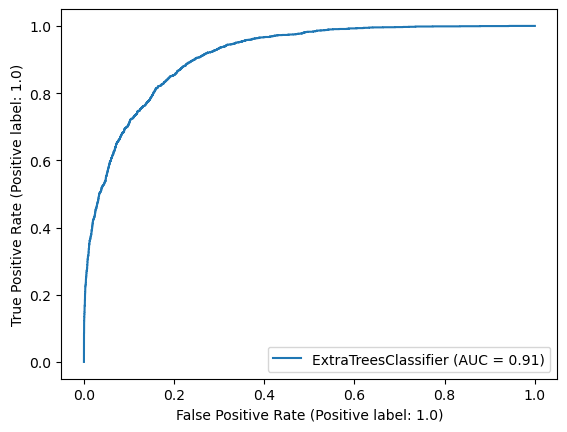

In [102]:
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

disp = plot_roc_curve(Final_model, x_test, y_test)
plot_roc_curve(RandomForestClassifier, x_test, y_test, ax=disp.ax_)
plot_roc_curve(LogisticRegression, x_test, y_test, ax=disp.ax_)
plot_roc_curve(SVC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GradientBoostingClassifier, x_test, y_test, ax=disp.ax_)
plot_roc_curve(AdaBoostClassifier, x_test, y_test, ax=disp.ax_)
plot_roc_curve(BaggingClassifier, x_test, y_test, ax=disp.ax_)
plt.legend(prop={'size': 11}, loc='lower right')
plt.show()


In [73]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_prob = Final_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr, label='RandomForestClassifier (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


ValueError: multiclass format is not supported

In [75]:
import joblib

joblib.dump(Final_model, 'zomato1.pkl')

model = joblib.load('zomato1.pkl')

# Prediction
prediction = model.predict(x_test)
a = np.array(y_test)
data = pd.DataFrame()
data['Predicted'] = prediction
data['Original'] = a

